<a href="https://colab.research.google.com/github/Qaiserfarooq285/AI-Resume-Analyzer/blob/main/overall%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Downloading Dataset**

In [ ]:
import os
import json
with open('/content/kaggle.json') as f:
    kaggle_json = json.load(f)
    os.environ['KAGGLE_USERNAME'] = kaggle_json['username']
    os.environ['KAGGLE_KEY'] = kaggle_json['key']

In [ ]:
!kaggle datasets download tirendazacademy/fifa-world-cup-2022-tweets

Dataset URL: https://www.kaggle.com/datasets/tirendazacademy/fifa-world-cup-2022-tweets
License(s): CC0-1.0
  0% 0.00/1.38M [00:00<?, ?B/s]
100% 1.38M/1.38M [00:00<00:00, 46.2MB/s]


In [ ]:
!unzip fifa-world-cup-2022-tweets.zip

Archive:  fifa-world-cup-2022-tweets.zip
  inflating: fifa_world_cup_2022_tweets.csv  


In [ ]:
!pip install -U "tensorflow-text==2.13.*"

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.17.0
    Uninstalling tf_keras-

In [ ]:
!pip install --quiet tensorflow_text
import re
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')
stopwords.words('english')
exclude = string.punctuation

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
tempdf = pd.read_csv('/content/fifa_world_cup_2022_tweets.csv')
df = tempdf.iloc[:8000]


In [ ]:
df.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative


In [ ]:
df.drop("Unnamed: 0", axis = 1, inplace= True)

<ipython-input-65-8d80297914a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Unnamed: 0", axis = 1, inplace= True)


# **Text PreProcessing**

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize # Import word_tokenize

def preprocess(text):
    text = re.sub(r'(^|\s)@(\w+)', '', text)
    text = re.sub(r'\bhttps?://\S+\b', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()

    tokens = word_tokenize(text) # Now word_tokenize is accessible
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    text = ' '.join(tokens)
    return text

In [ ]:
df['Tweet'] = df['Tweet'].apply(preprocess)

<ipython-input-67-41eb3d697dbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet'] = df['Tweet'].apply(preprocess)


In [ ]:
df.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,drinking today worldcup,neutral
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,amazing worldcup launch video show much face c...,positive
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,worth reading watching worldcup,positive
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,golden maknae shinning bright jeonjungkook jun...,positive
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,bbc care much human right homosexual right wom...,negative


In [ ]:
df.shape

(8000, 5)

In [ ]:

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")


In [ ]:
# 2. Build the Model (for multi-class classification)
def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessed_text = bert_preprocess(text_input)
    outputs = bert_encoder(preprocessed_text)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(3, activation='softmax', name='classifier')(net)  # 3 classes: positive, negative, neutral
    return tf.keras.Model(text_input, net)

classifier_model = build_classifier_model()


In [ ]:
# Map sentiment values to numerical labels
sentiment_mapping = {'positive': 0, 'negative': 1, 'neutral': 2}
df['sentiment_label'] = df['Sentiment'].map(sentiment_mapping)  # Assuming 'sentiment' is your target column

# Now X and y are derived from the DataFrame
X = df['Tweet'].values
y = df['sentiment_label'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-72-fb64c09f6ad8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_label'] = df['Sentiment'].map(sentiment_mapping)  # Assuming 'sentiment' is your target column


In [ ]:
classifier_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
history = classifier_model.fit(X_train, y_train, epochs=1, batch_size=32)


200/200 [==============================] - 2147s 11s/step - loss: 1.1147 - accuracy: 0.3688


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report


# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features (words)

# Fit and transform training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data (use the same vectorizer fitted on training data)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = rf_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6344
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.56      0.62       455
           1       0.71      0.59      0.64       530
           2       0.57      0.73      0.64       615

    accuracy                           0.63      1600
   macro avg       0.65      0.63      0.63      1600
weighted avg       0.65      0.63      0.63      1600



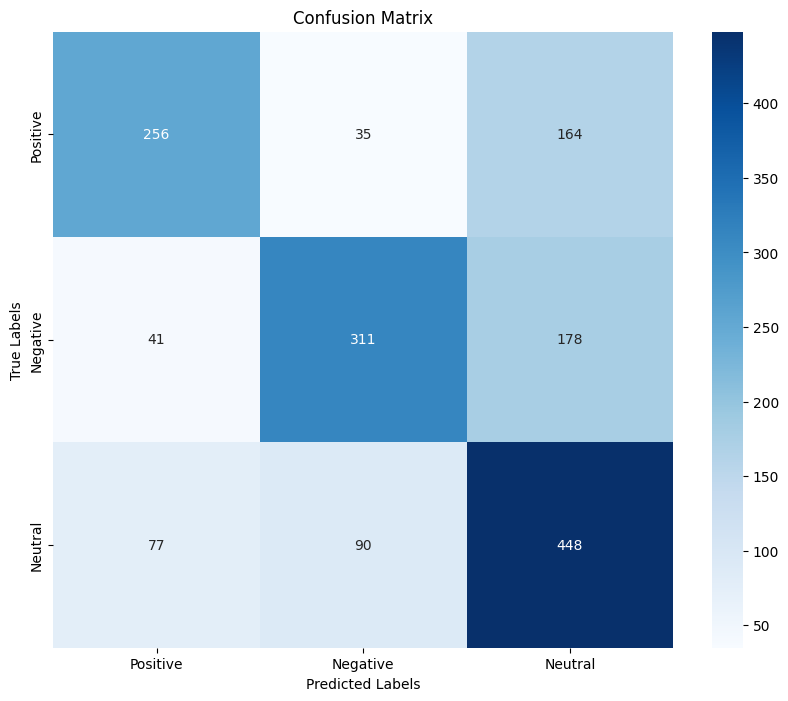

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test are your true labels and y_pred are your predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Positive', 'Negative', 'Neutral'],
            yticklabels=['Positive', 'Negative', 'Neutral'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()